LIBRERIAS

In [835]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, silhouette_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

IMPORTACIÓN DE DATASET

In [836]:
beer_ML = pd.read_csv("./cerveza.csv")
beer_ML = beer_ML.copy()
beer_ML.head()

,nombre,estilo,alcohol_%,min_IBU,max_IBU,astringencia,cuerpo,alcohol_gr/lt,amargor,dulzor,...,salado,frutado,lupulo,especias,malteado,opinion_aroma,opinion_apariencia,opinion_paladar,opinion_sabor,opinion_general
0,Amber,Altbier,5.3,25,50,13,32,9,47,74,...,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85
1,Double Bag,Altbier,7.2,25,50,12,57,18,33,55,...,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03
2,Long Trail Ale,Altbier,5.0,25,50,14,37,6,42,43,...,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83
3,Doppelsticke,Altbier,8.5,25,50,13,55,31,47,101,...,1,49,40,16,119,4.15,4.03,4.15,4.21,4.01
4,Sleigh'r Dark Doüble Alt Ale,Altbier,7.2,25,50,25,51,26,44,45,...,1,11,51,20,95,3.62,3.97,3.73,3.77,3.82


In [837]:
# Observo la brecha de valores de mi Target
beer_ML['opinion_general'].describe()[["min","max"]]

min    2.87
max    4.70
Name: opinion_general, dtype: float64

PCA - Análisis de los Componentes Principales

In [838]:
# DataFrame sin strings
beer_ML_numerico = beer_ML.drop(["nombre",	"estilo"], axis=1)
beer_ML_numerico

,alcohol_%,min_IBU,max_IBU,astringencia,cuerpo,alcohol_gr/lt,amargor,dulzor,acidez,salado,frutado,lupulo,especias,malteado,opinion_aroma,opinion_apariencia,opinion_paladar,opinion_sabor,opinion_general
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03
2,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83
3,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.15,4.03,4.15,4.21,4.01
4,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.62,3.97,3.73,3.77,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,8.8,35,50,15,37,24,35,46,19,0,23,45,4,74,4.12,3.88,3.88,3.75,4.00
3193,6.0,35,50,15,31,23,16,54,43,0,54,14,4,58,3.95,3.75,3.76,3.79,3.73
3194,6.8,35,50,8,44,24,19,52,21,0,26,21,4,77,3.58,3.71,3.60,3.67,3.71
3195,7.5,35,50,11,36,7,70,72,59,0,81,110,18,73,3.90,3.89,3.86,3.90,3.88


Estandarizo las variables que se encuentran mayormente correlacionadas

In [839]:
variables_stand = beer_ML_numerico.drop(["alcohol_%",	"min_IBU",	"max_IBU",	"astringencia",	"cuerpo",	"alcohol_gr/lt",	"amargor",	"dulzor",	"acidez",	"salado",	"frutado",	"lupulo",	"especias",	"malteado"], axis=1)

stand = StandardScaler()
beer_ML_numerico[variables_stand.columns] = stand.fit_transform(beer_ML_numerico[variables_stand.columns])

Escalo todas las columnas y convierto el resultado en un DataFrame de pandas

In [840]:
min_max_scaler = MinMaxScaler()
beer_ML_numerico_scaled = min_max_scaler.fit_transform(beer_ML_numerico)

beer_ML_numerico_scaled = pd.DataFrame(beer_ML_numerico_scaled, columns=beer_ML_numerico.columns)

In [841]:
# Observo la media y la mediana luego de estandarizar
beer_ML_numerico_scaled.describe()

,alcohol_%,min_IBU,max_IBU,astringencia,cuerpo,alcohol_gr/lt,amargor,dulzor,acidez,salado,frutado,lupulo,especias,malteado,opinion_aroma,opinion_apariencia,opinion_paladar,opinion_sabor,opinion_general
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,0.494172,0.459642,0.499669,0.393325,0.421218,0.280596,0.333218,0.392026,0.277668,0.176728,0.284331,0.331611,0.241943,0.392753,0.512476,0.527389,0.516567,0.529009,0.520519
std,0.175025,0.220329,0.213852,0.216425,0.207779,0.220829,0.222856,0.213433,0.219590,0.315509,0.235672,0.232446,0.226282,0.205013,0.180622,0.174287,0.181295,0.190110,0.180436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368932,0.375000,0.357143,0.230769,0.287129,0.130435,0.163462,0.230769,0.113636,0.000000,0.090909,0.141593,0.078431,0.236842,0.421296,0.424051,0.407216,0.416667,0.420765
50%,0.441748,0.500000,0.500000,0.358974,0.376238,0.195652,0.288462,0.363636,0.204545,0.000000,0.212121,0.274336,0.156863,0.378947,0.523148,0.556962,0.536082,0.553922,0.546448
75%,0.592233,0.500000,0.571429,0.512821,0.534653,0.391304,0.480769,0.517483,0.397727,0.500000,0.446970,0.469027,0.352941,0.536842,0.643519,0.626582,0.654639,0.647059,0.633880
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las medias cercanas a cero y las desviaciones estándar cercanas a uno indican que los datos están centrados y escalados adecuadamente.

In [842]:
beer_ML_PCA = beer_ML_numerico_scaled.drop(["opinion_general"], axis=1)

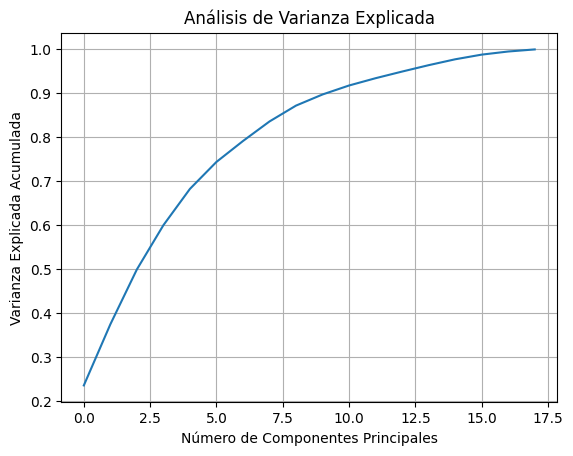

In [843]:
pca = PCA()
beer_pos_PCA = pca.fit_transform(beer_ML_PCA)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Análisis de Varianza Explicada")
plt.grid(True)
plt.show()

In [844]:
# Averiguo el número de componentes principales para el 95% de varianza

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
num_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"Número de componentes principales para el 95% de varianza: {num_componentes_95}")

Número de componentes principales para el 95% de varianza: 14


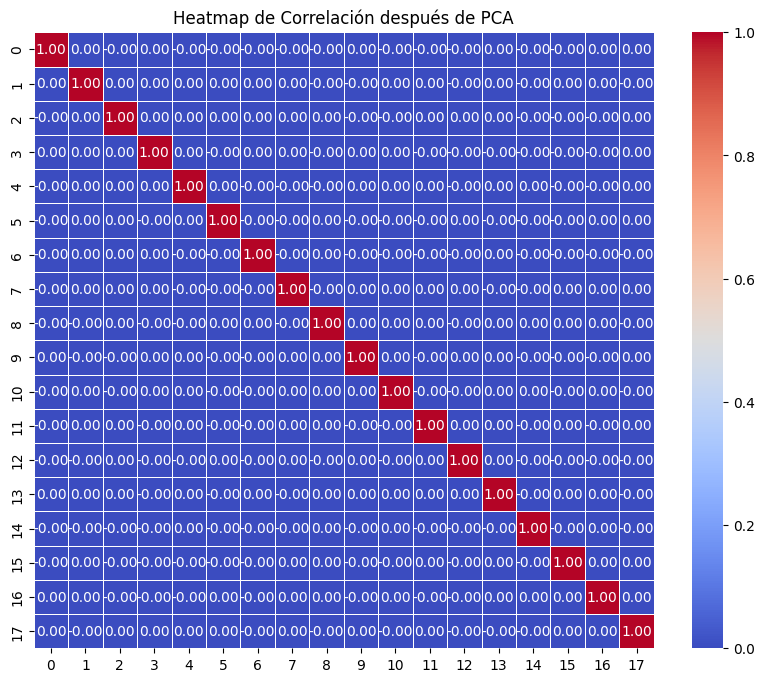

In [845]:
beer_pos_PCA_ = pd.DataFrame(beer_pos_PCA)

# Corroboro la nueva matriz de correlación
correlation_matrix = beer_pos_PCA_.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap de Correlación después de PCA')
plt.show()

MODELO: CLASIFICACION (REGRESIÓN LOGÍSTICA)  

TARGET = "opinión_general"  

División en datos de entrenamiento y datos de prueba:

In [846]:
# x_clasif = beer_ML.drop(columns=["nombre", "estilo", "opinion_general"])
# y_clasif = beer_ML["opinion_general"]

x_clasif = beer_pos_PCA_
y_clasif = beer_ML_numerico_scaled["opinion_general"]

x_train, x_test, y_train, y_test = train_test_split(x_clasif,y_clasif,test_size=0.25, random_state=40)

In [847]:
possible_bins = range(2, 4) # Valores de bins a probar

mean_accuracy_scores = []

# Itero sobre cada valor de bins y evalúo el rendimiento del modelo
for num_bins in possible_bins:
    # Discretizo la variable
    y_discretized = pd.cut(y_clasif, bins=num_bins, labels=False)
    
    # Calculo la precisión media utilizando CV
    clf = DecisionTreeClassifier()
    accuracy_scores = cross_val_score(clf, x_clasif, y_discretized, cv=5)  # Utiliza 5-fold cross-validation
    mean_accuracy = np.mean(accuracy_scores)
    mean_accuracy_scores.append(mean_accuracy)

# Averiguo el número óptimo de bins con la precisión media más alta
optimal_bins = possible_bins[np.argmax(mean_accuracy_scores)]
print("Número óptimo de bins:", optimal_bins)

Número óptimo de bins: 2


El número óptimo de clusters según el Método de la Silueta es: 2
El número óptimo de clusters según el Método del Codo es: 3


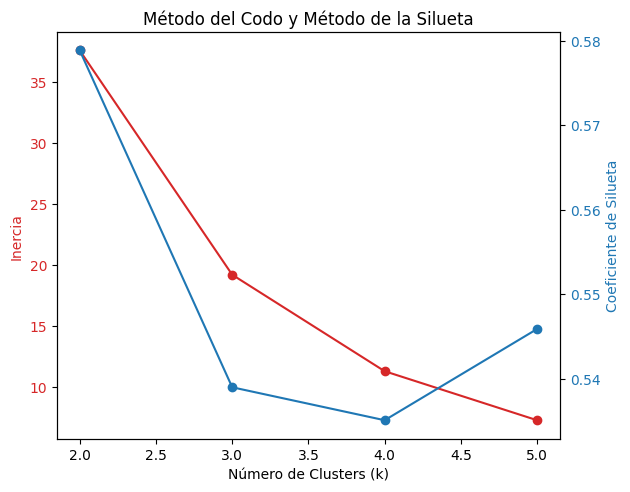

In [848]:
inertia_values = []         # inercia
silhouette_scores = []      # silueta

# Valores de "k" a probar
k_values = range(2, 6)

# Calculo la inercia y el coeficiente de silueta para diferentes valores de "k"
for k in k_values:

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(y_clasif.values.reshape(-1, 1))
    inertia_values.append(kmeans.inertia_)
    
    y_pred = kmeans.predict(y_clasif.values.reshape(-1, 1))
    silhouette_avg = silhouette_score(y_clasif.values.reshape(-1, 1), y_pred)
    silhouette_scores.append(silhouette_avg)


# Valor de k que maximiza el coeficiente de silueta
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print(f"El número óptimo de clusters según el Método de la Silueta es: {optimal_k_silhouette}")

def find_elbow(inertia_values):
    deltas = [inertia_values[i] - inertia_values[i+1] for i in range(len(inertia_values)-1)]
    max_delta_idx = deltas.index(max(deltas))
    return max_delta_idx + 1

# Punto donde se encuentra el codo
elbow_idx = find_elbow(inertia_values)

# Número óptimo de clusters según el método del codo
optimal_k_elbow = k_values[elbow_idx]
print(f"El número óptimo de clusters según el Método del Codo es: {optimal_k_elbow}")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia', color=color)
ax1.plot(k_values, inertia_values, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Coeficiente de Silueta', color=color)  
ax2.plot(k_values, silhouette_scores, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Método del Codo y Método de la Silueta')
plt.show()

In [849]:
# Agrego la columna de etiquetas discretizadas al nuevo DataFrame
beer_ML_plus = beer_ML.copy()
beer_ML_plus['etiqueta'] = y_discretized  

In [850]:
etiquetas_unicas = beer_ML_plus['etiqueta'].nunique()
etiquetas_ = beer_ML_plus['etiqueta'].unique()
type_etiquetas = beer_ML_plus['etiqueta'].dtype

print(f"La TARGET queda conformada por {etiquetas_unicas} etiquetas, que son {etiquetas_} y el tipo de dato es {type_etiquetas}.")

La TARGET queda conformada por 3 etiquetas, que son [1 2 0] y el tipo de dato es int64.


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Número óptimo de clusters (k): 4


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


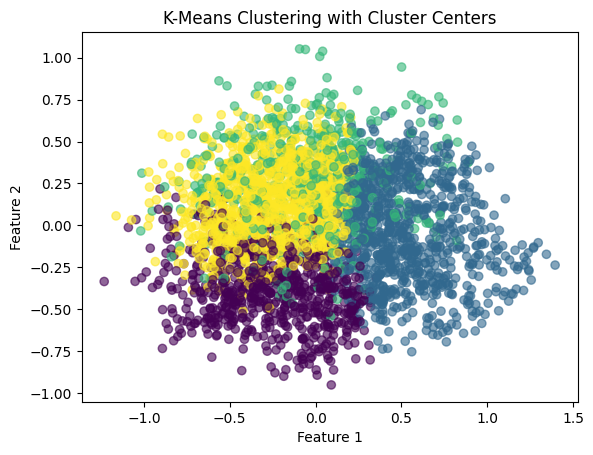

In [851]:
k_values = range(2, 5)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_clasif)
    silhouette_scores.append(kmeans.inertia_)

optimal_k = k_values[np.argmin(silhouette_scores)]
print("Número óptimo de clusters (k):", optimal_k)

# Ajusto K-Means con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(x_clasif)

# Asigno las etiquetas de los clusters a los datos
cluster_labels = kmeans_optimal.labels_

plt.scatter(x_clasif.iloc[:, 0], x_clasif.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Cluster Centers')
plt.show()

In [852]:
print("Límites:", limits)

print(beer_ML['opinion_general'])

Límites: [2.87, 3.48, 4.09, 4.71]
0       3.85
1       4.03
2       3.83
3       4.01
4       3.82
        ... 
3192    4.00
3193    3.73
3194    3.71
3195    3.88
3196    3.53
Name: opinion_general, Length: 3197, dtype: float64


In [853]:
# Calcula la frecuencia de cada clase
frecuencia_clases = beer_ML_plus['etiqueta'].value_counts()

# Calcula el porcentaje de datos en cada clase
porcentaje_clases = (frecuencia_clases / len(beer_ML_plus['etiqueta'])) * 100

# Imprime los resultados
print("Frecuencia de cada clase:")
print(frecuencia_clases)
print("\nPorcentaje de datos en cada clase:")
print(porcentaje_clases)

Frecuencia de cada clase:
etiqueta
1    2138
2     592
0     467
Name: count, dtype: int64

Porcentaje de datos en cada clase:
etiqueta
1    66.875195
2    18.517360
0    14.607444
Name: count, dtype: float64


BALANCEADO DE DATASET

Conteo de Etiquetas (antes de SMOTE): Counter({1: 2138, 2: 592, 0: 467})
Nuevo conteo de Etiquetas (después de SMOTE): Counter({1: 2138, 2: 2138, 0: 2138})


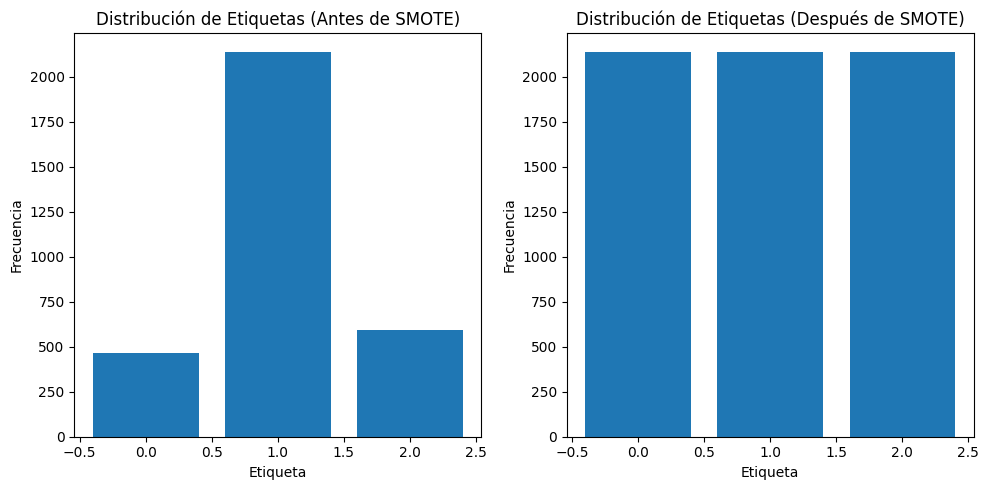

In [854]:
# Conteo de etiquetas antes de aplicar SMOTE
conteo_etiquetas_original = Counter(Y)
print("Conteo de Etiquetas (antes de SMOTE):", conteo_etiquetas_original)

# Inicializar el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para generar ejemplos sintéticos
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Conteo de etiquetas después de aplicar SMOTE
nuevo_conteo_etiquetas = Counter(Y_resampled)
print("Nuevo conteo de Etiquetas (después de SMOTE):", nuevo_conteo_etiquetas)

# Crear gráfico antes y después de SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(conteo_etiquetas_original.keys(), conteo_etiquetas_original.values())
plt.title("Distribución de Etiquetas (Antes de SMOTE)")
plt.xlabel("Etiqueta")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.bar(nuevo_conteo_etiquetas.keys(), nuevo_conteo_etiquetas.values())
plt.title("Distribución de Etiquetas (Después de SMOTE)")
plt.xlabel("Etiqueta")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

NUEVA DIVISIÓN DE DATOS LUEGO DE PCA, DISCRETIZACIÓN Y BALANCEO DE TARGET

In [855]:
X = beer_pos_PCA_
Y = beer_ML_plus['etiqueta']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Cross-Validation:

In [856]:
clf = RandomForestClassifier(random_state=40)

cross_validation_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='balanced_accuracy')

print("Precisión promedio en validación cruzada: {:.2f}".format(cross_validation_scores.mean()))

Precisión promedio en validación cruzada: 0.64


ENTRENAMIENTO, PREDICCIÓN Y EVALUACIÓN DE MODELOS

- REGRESIÓN LOGÍSTICA

In [858]:
beer_ML_rlog = LogisticRegression()
beer_ML_rlog.fit(X, Y)

prediccion_RL = beer_ML_rlog.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_RL)
print("Precisión del modelo de Regresión Logística:", accuracy)

Precisión del modelo de Regresión Logística: 0.8390625


- SVC

In [859]:
svm_model = SVC()

svm_model.fit(X, Y)

prediccion_SVC = svm_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_SVC)
print("Precisión del modelo de SVM:", accuracy)

Precisión del modelo de SVM: 0.890625


- KNN

In [860]:
knn_model = KNeighborsClassifier()

knn_model.fit(X, Y)

prediccion_KNN = knn_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_KNN)
print("Precisión del modelo de KNN:", accuracy)

Precisión del modelo de KNN: 0.8609375


- ÁRBOLES DE DECISIÓN

In [861]:
arbol_model = DecisionTreeClassifier()

arbol_model.fit(X, Y)

prediccion_AD = arbol_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_AD)
print("Precisión del modelo de Árbol de Decisión:", accuracy)

Precisión del modelo de Árbol de Decisión: 1.0


- RANDOM FOREST

In [862]:
forest_model = RandomForestClassifier()

forest_model.fit(X, Y)

prediccion_RF = forest_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_RF)
print("Precisión del modelo de Random Forest:", accuracy)

Precisión del modelo de Random Forest: 1.0


- ADABOOST

In [863]:
adaboost_model = AdaBoostClassifier()

adaboost_model.fit(X, Y)
prediccion_ADABOOST = adaboost_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_ADABOOST)
print("Precisión del modelo de AdaBoost:", accuracy)

Precisión del modelo de AdaBoost: 0.81875


- GRADIENT BOOSTING - XGBOOST

In [864]:
xgboost_model = XGBClassifier()

xgboost_model.fit(X, Y)
prediccion_XGBoost = xgboost_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_XGBoost)
print("Precisión del modelo de XGBoost:", accuracy)

Precisión del modelo de XGBoost: 1.0


- BAGGING

In [865]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300,
                            max_samples=10, n_jobs=-1, random_state=42)
bag_clf.fit(X, Y)

prediccion_Bagging = bag_clf.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_Bagging)
print("Precisión del modelo de Bagging:", accuracy)

Precisión del modelo de Bagging: 0.6609375


- REDES NEURONALES

In [878]:
red_model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', alpha=0.001)

red_model.fit(X, Y)
prediccion_RED_NEU = red_model.predict(X_test)

accuracy = accuracy_score(Y_test, prediccion_RED_NEU)
print("Precisión del modelo de Redes Neuronales:", accuracy)

Precisión del modelo de Redes Neuronales: 0.9515625


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANÁLISIS DE LAS MÉTRICAS DE LOS MODELOS - REPORTES DE CLASIFICACIÓN

In [866]:
modelos = {
    "Regresión Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Arbol de Decisión": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
}

hiperparametros = {
    "Regresión Logística": {'modelo__C': [1, 5, 10], 'modelo__penalty': ['l1','l2']},
    "Random Forest": {'modelo__n_estimators': [75, 100, 125], 'modelo__max_depth': [None, 5, 10, 15, 20], 'modelo__min_samples_split': [1, 5, 10], 'modelo__min_samples_leaf': [1, 5, 10]},
    "AdaBoost": {'modelo__n_estimators': [50, 100, 150], 'modelo__learning_rate': [0.1, 1, 10]},
    "Arbol de Decisión": {'modelo__criterion': ['gini','entropy'], 'modelo__splitter': ['best','random'], 'modelo__max_features': [None,'sqrt']},
    "SVC": {'modelo__C': [0.01, 0.1, 1, 10], 'modelo__kernel': ['rbf', 'sigmoid'], 'modelo__gamma': ['scale','auto']},
    "KNN": {'modelo__n_neighbors': [1, 5, 10], 'modelo__weights': ['uniform','distance'], 'modelo__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']},
}

pipeline = []

for nombre_modelo, modelo in modelos.items():
    print(f"Entrenando y evaluando el modelo {nombre_modelo}")

    # Obtener hiperparámetros específicos para el modelo
    hiperparametros_modelo = hiperparametros.get(nombre_modelo, {})

    # Crear el pipeline
    pipeline = Pipeline([('modelo', modelo)])

    # Verificar si el modelo admite búsqueda de cuadrícula
    if hiperparametros_modelo:
        grid_search = GridSearchCV(estimator=pipeline, param_grid=hiperparametros_modelo, scoring='accuracy', cv=3)
        grid_search.fit(X, Y)
        mejor_modelo = grid_search.best_estimator_
    else:
        mejor_modelo = pipeline.fit(X, Y)

    # Realizar predicciones
    prediccion_entrenamiento = mejor_modelo.predict(X_train)
    prediccion_prueba = mejor_modelo.predict(X_test)

    # Imprimir informe de clasificación para el modelo
    reporte_entrenamiento = classification_report(Y_train, prediccion_entrenamiento)
    reporte_prueba = classification_report(Y_test, prediccion_prueba)

    print(f"Informe de Clasificación para {nombre_modelo} en datos de entrenamiento:")
    print(reporte_entrenamiento)
    print(f"Informe de Clasificación para {nombre_modelo} en datos de prueba:")
    print(reporte_prueba)

Entrenando y evaluando el modelo Regresión Logística


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\feder\AppData\

Informe de Clasificación para Regresión Logística en datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       368
           1       0.86      0.93      0.89      1715
           2       0.82      0.71      0.76       474

    accuracy                           0.85      2557
   macro avg       0.84      0.76      0.79      2557
weighted avg       0.85      0.85      0.84      2557

Informe de Clasificación para Regresión Logística en datos de prueba:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71        99
           1       0.86      0.93      0.89       423
           2       0.81      0.78      0.79       118

    accuracy                           0.85       640
   macro avg       0.84      0.77      0.80       640
weighted avg       0.85      0.85      0.84       640

Entrenando y evaluando el modelo Random Forest


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\feder\App

Informe de Clasificación para Random Forest en datos de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       368
           1       1.00      1.00      1.00      1715
           2       1.00      1.00      1.00       474

    accuracy                           1.00      2557
   macro avg       1.00      1.00      1.00      2557
weighted avg       1.00      1.00      1.00      2557

Informe de Clasificación para Random Forest en datos de prueba:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       1.00      1.00      1.00       423
           2       1.00      1.00      1.00       118

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

Entrenando y evaluando el modelo AdaBoost
Informe de Clasificación para AdaBoost en datos de entrenamie

In [877]:
report = classification_report(Y_test, prediccion_RED_NEU)
print("\nInforme de clasificación:\n", report)


Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        99
           1       0.96      0.97      0.96       423
           2       0.93      0.93      0.93       118

    accuracy                           0.95       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.95      0.95      0.95       640



In [868]:
print(classification_report(Y_test, bag_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.66      1.00      0.80       423
           2       0.00      0.00      0.00       118

    accuracy                           0.66       640
   macro avg       0.22      0.33      0.27       640
weighted avg       0.44      0.66      0.53       640



c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [869]:
modelos = {
    "Regresión Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Arbol de Decisión": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Redes Neuronales": MLPClassifier()
    }

metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X, Y, cv=5, scoring=metricas)
    
    for metrica in metricas:
        
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()
    
resultados = pd.DataFrame([resultados_dict])

c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\feder\AppData\L

In [870]:
resultados.T.sort_values(by=0, ascending=False)

,0
Redes Neuronales_roc_auc_ovr,0.936803
Regresión Logística_roc_auc_ovr,0.926209
Random Forest_roc_auc_ovr,0.903551
Redes Neuronales_accuracy,0.840170
Regresión Logística_precision_macro,0.831435
KNN_roc_auc_ovr,0.830118
Regresión Logística_accuracy,0.825786
SVC_accuracy,0.825161
Redes Neuronales_precision_macro,0.821049
SVC_precision_macro,0.815752


In [871]:
models_gridsearch = {}

models = [
    ("Regresión Logística", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Arbol de Decisión", DecisionTreeClassifier()),
    ("SVC", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Redes Neuronales", MLPClassifier())
]

for model_name, model_instance in models:
    models_gridsearch[model_name] = GridSearchCV(model_instance,
                                                 param_grid={},
                                                 cv=10,
                                                 scoring="accuracy",
                                                 verbose=1,
                                                 n_jobs=-1)
    
    models_gridsearch[model_name].fit(X, Y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [872]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
6,Redes Neuronales,0.827347
4,SVC,0.823898
0,Regresión Logística,0.819827
1,Random Forest,0.779172
2,AdaBoost,0.768843
5,KNN,0.730081
3,Arbol de Decisión,0.695969


In [875]:
models_gridsearch['Redes Neuronales'].best_estimator_

MLPClassifier()

MODELO ELEGIDO

In [876]:
models_gridsearch['Redes Neuronales'].best_estimator_.score(X_test, Y_test)

0.890625

GUARDADO DE MODELO

In [ ]:
import pickle

with open('finished_model.model', "wb") as archivo_salida:
    pickle.dump(models_gridsearch['reg_log'].best_estimator_, archivo_salida)